In [1]:
pwd

'C:\\Users\\91974\\Downloads'

In [128]:
cd C:\\Users\\91974\\Downloads\\ML_Artivatic_dataset

C:\Users\91974\Downloads\ML_Artivatic_dataset


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn import decomposition
from scipy.sparse import hstack
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import lightgbm as lgb
from scipy.stats import randint as sp_randint


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/ML_Artivatic_dataset/train_indessa.csv")

In [ ]:
data

member_id  loan_amnt  ...  total_rev_hi_lim  loan_status
0        58189336      14350  ...           30800.0            0
1        70011223       4800  ...           32900.0            0
2        70255675      10000  ...           34900.0            0
3         1893936      15000  ...           24700.0            0
4         7652106      16000  ...           47033.0            0
...           ...        ...  ...               ...          ...
532423   31296187      20000  ...           24800.0            0
532424   29403184      12000  ...           17800.0            0
532425    7357607      18725  ...           24200.0            1
532426   23182668      21000  ...           23300.0            0
532427   46122259      10000  ...           21700.0            0

[532428 rows x 45 columns]

In [ ]:
data.shape

(532428, 45)

## Exploratory Data Analysis

In [ ]:
#Removing string from continuous data
data["term"] = data["term"].str.extract('(\d+)').astype(int)

In [ ]:
#Removing string from continuous data
data["last_week_pay"] = data["last_week_pay"].str.extract('(\d+)')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532428 entries, 0 to 532427
Data columns (total 45 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   member_id                    532428 non-null  int64  
 1   loan_amnt                    532428 non-null  int64  
 2   funded_amnt                  532428 non-null  int64  
 3   funded_amnt_inv              532428 non-null  float64
 4   term                         532428 non-null  int64  
 5   batch_enrolled               447279 non-null  object 
 6   int_rate                     532428 non-null  float64
 7   grade                        532428 non-null  object 
 8   sub_grade                    532428 non-null  object 
 9   emp_title                    501595 non-null  object 
 10  emp_length                   505537 non-null  object 
 11  home_ownership               532428 non-null  object 
 12  annual_inc                   532425 non-null  float64
 13 

In [ ]:
data.isnull().mean() * 100

member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
term                            0.000000
batch_enrolled                 15.992585
int_rate                        0.000000
grade                           0.000000
sub_grade                       0.000000
emp_title                       5.791018
emp_length                      5.050636
home_ownership                  0.000000
annual_inc                      0.000563
verification_status             0.000000
pymnt_plan                      0.000000
desc                           85.801085
purpose                         0.000000
title                           0.016904
zip_code                        0.000000
addr_state                      0.000000
dti                             0.000000
delinq_2yrs                     0.003005
inq_last_6mths                  0.003005
mths_since_last_delinq         51.190771
mths_since_last_

CPU times: user 11.2 s, sys: 523 ms, total: 11.8 s
Wall time: 11.6 s


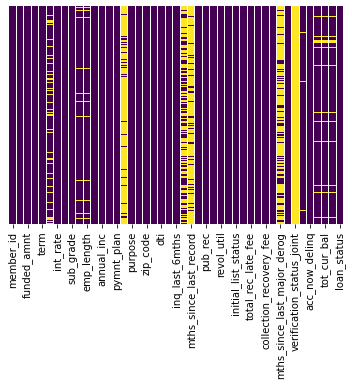

In [ ]:
%%time
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
#Missing value count for each label
data.set_index('loan_status').isna().sum(level=0).T/len(data)*100

loan_status                          0          1
member_id                     0.000000   0.000000
loan_amnt                     0.000000   0.000000
funded_amnt                   0.000000   0.000000
funded_amnt_inv               0.000000   0.000000
term                          0.000000   0.000000
batch_enrolled               12.212731   3.779854
int_rate                      0.000000   0.000000
grade                         0.000000   0.000000
sub_grade                     0.000000   0.000000
emp_title                     4.590104   1.200914
emp_length                    4.207705   0.842931
home_ownership                0.000000   0.000000
annual_inc                    0.000000   0.000563
verification_status           0.000000   0.000000
pymnt_plan                    0.000000   0.000000
desc                         70.597902  15.203182
purpose                       0.000000   0.000000
title                         0.016152   0.000751
zip_code                      0.000000   0.000000
addr_state                    0.000000   0.000000
dti                           0.000000   0.000000
delinq_2yrs                   0.000563   0.002442
inq_last_6mths                0.000563   0.002442
mths_since_last_delinq       38.050967  13.139805
mths_since_last_record       63.951933  20.623821
open_acc                      0.000563   0.002442
pub_rec                       0.000563   0.002442
revol_bal                     0.000000   0.000000
revol_util                    0.035310   0.018594
total_acc                     0.000563   0.002442
initial_list_status           0.000000   0.000000
total_rec_int                 0.000000   0.000000
total_rec_late_fee            0.000000   0.000000
recoveries                    0.000000   0.000000
collection_recovery_fee       0.000000   0.000000
collections_12_mths_ex_med    0.004320   0.013523
mths_since_last_major_derog  55.752891  19.270962
application_type              0.000000   0.000000
verification_status_joint    76.310224  23.632491
last_week_pay                 1.993509   0.000000
acc_now_delinq                0.000563   0.002442
tot_coll_amt                  1.630267   6.258874
tot_cur_bal                   1.630267   6.258874
total_rev_hi_lim              1.630267   6.258874

In [ ]:
#checking for any duplicated rows
data.duplicated().sum()

0

Text(0.5, 1.0, 'CDF plot for loan amount')

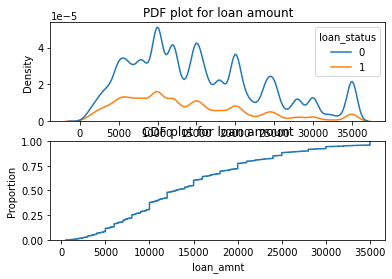

In [ ]:
f, axes = plt.subplots(2)
sns.kdeplot(data=data, x="loan_amnt", hue="loan_status", ax=axes[0]).set_title('PDF plot for loan amount')
sns.ecdfplot(data["loan_amnt"],ax=axes[1]).set_title('CDF plot for loan amount')

Text(0.5, 1.0, 'Box plot for loan amount')

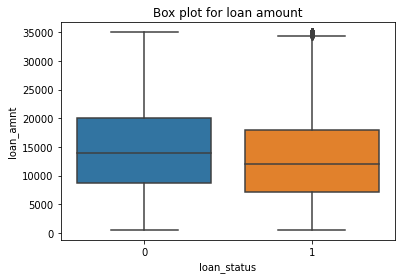

In [ ]:
sns.boxplot(data=data, y="loan_amnt", x="loan_status").set_title('Box plot for loan amount')

Text(0.5, 1.0, 'CDF plot for funded amount')

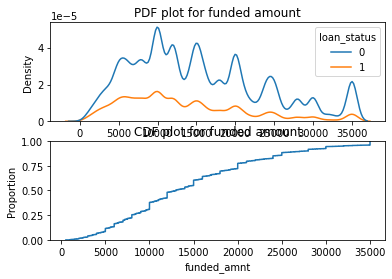

In [ ]:
f, axes = plt.subplots(2)
sns.kdeplot(data=data, x="funded_amnt", hue="loan_status", ax=axes[0]).set_title('PDF plot for funded amount')
sns.ecdfplot(data["funded_amnt"],ax=axes[1]).set_title('CDF plot for funded amount')

Text(0.5, 1.0, 'Box plot for funded amount')

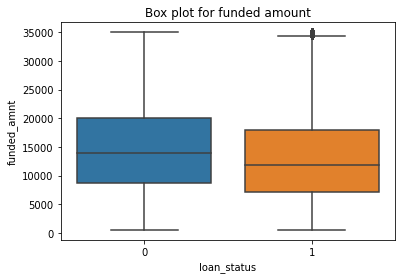

In [ ]:
sns.boxplot(data=data, y="funded_amnt", x="loan_status").set_title('Box plot for funded amount')


Text(0.5, 1.0, 'CDF plot for funded amount_inv')

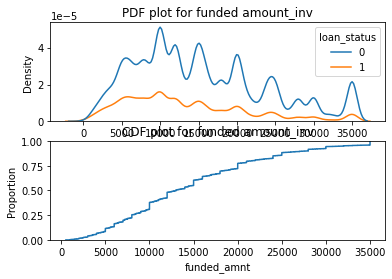

In [ ]:
f, axes = plt.subplots(2)
sns.kdeplot(data=data, x="funded_amnt_inv", hue="loan_status", ax=axes[0]).set_title('PDF plot for funded amount_inv')
sns.ecdfplot(data["funded_amnt"],ax=axes[1]).set_title('CDF plot for funded amount_inv')

Text(0.5, 1.0, 'Box plot for funded amount_inv')

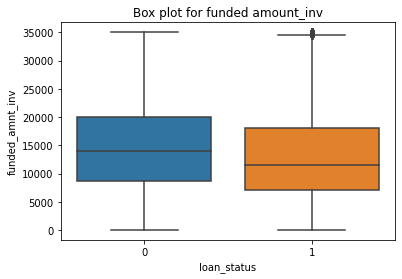

In [ ]:
sns.boxplot(data=data, y="funded_amnt_inv", x="loan_status").set_title('Box plot for funded amount_inv')

Text(0.5, 1.0, 'CDF plot for int_rate')

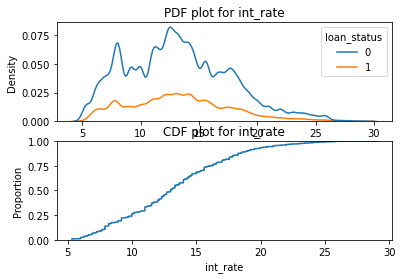

In [ ]:
f, axes = plt.subplots(2)
sns.kdeplot(data=data, x="int_rate", hue="loan_status", ax=axes[0]).set_title('PDF plot for int_rate')
sns.ecdfplot(data["int_rate"],ax=axes[1]).set_title('CDF plot for int_rate')

Text(0.5, 1.0, 'Box plot for int_rate')

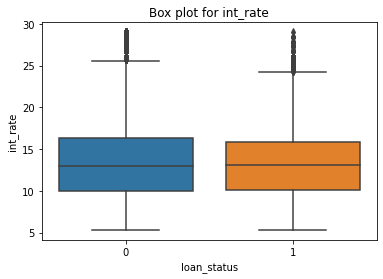

In [ ]:
sns.boxplot(data=data, y="int_rate", x="loan_status").set_title('Box plot for int_rate')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Count of each grade')

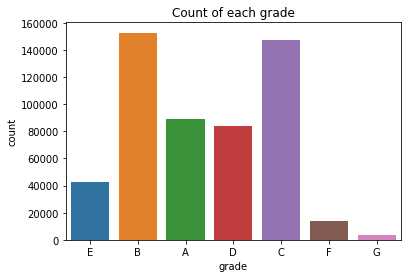

In [ ]:
sns.countplot(data.grade).set_title('Count of each grade')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Count of each subgrade')

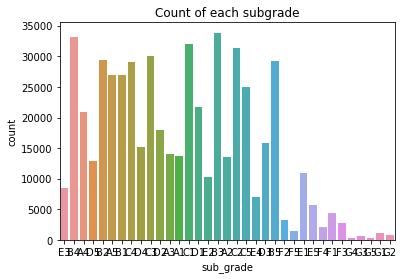

In [ ]:
sns.countplot(data.sub_grade).set_title('Count of each subgrade')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Count of each emp_length')

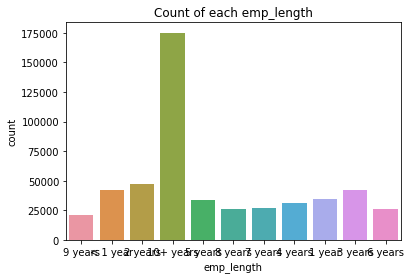

In [ ]:
sns.countplot(data.emp_length).set_title('Count of each emp_length')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Count of each home_ownership')

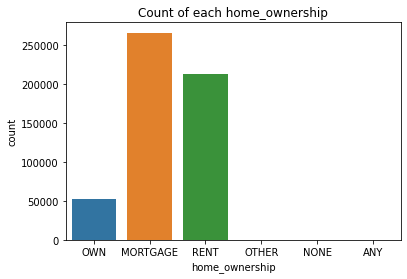

In [ ]:
sns.countplot(data.home_ownership).set_title('Count of each home_ownership')

Text(0.5, 1.0, 'CDF plot for annual_inc')

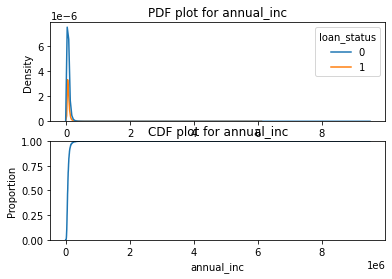

In [ ]:
f, axes = plt.subplots(2)
sns.kdeplot(data=data, x="annual_inc", hue="loan_status", ax=axes[0]).set_title('PDF plot for annual_inc')
sns.ecdfplot(data["annual_inc"],ax=axes[1]).set_title('CDF plot for annual_inc')

Text(0.5, 1.0, 'Box plot for annual_inc')

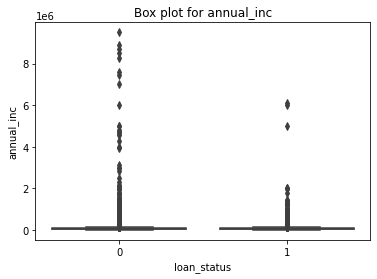

In [ ]:
sns.boxplot(data=data, y="annual_inc", x="loan_status").set_title('Box plot for annual_inc')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Count of each verification_status')

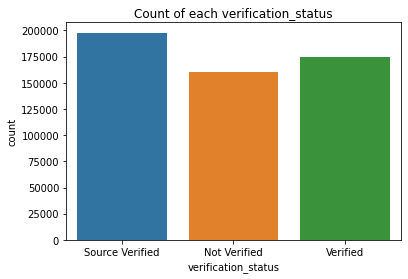

In [ ]:
sns.countplot(data.verification_status).set_title('Count of each verification_status')

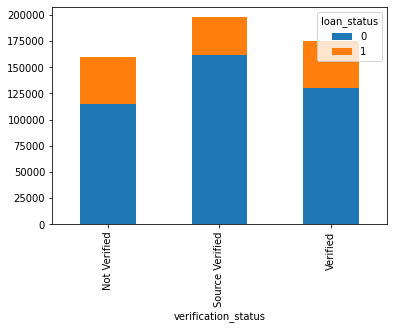

In [ ]:
df_plot = data.groupby(['loan_status', 'verification_status']).size().reset_index().pivot(columns='loan_status', index='verification_status', values=0)
df_plot.plot(kind='bar', stacked=True)

In [ ]:
data.revol_bal.value_counts()

0.0         2017
5235.0        52
5399.0        46
5466.0        45
5853.0        45
            ... 
52642.0        1
54096.0        1
52645.0        1
210583.0       1
63167.0        1
Name: revol_bal, Length: 63459, dtype: int64

Text(0.5, 1.0, 'CDF plot for tot_cur_bal')

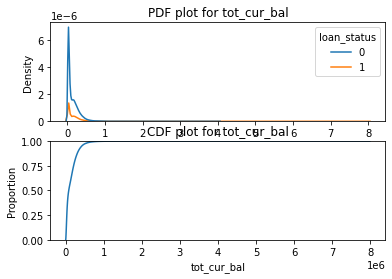

In [ ]:
f, axes = plt.subplots(2)
sns.kdeplot(data=data, x="tot_cur_bal", hue="loan_status", ax=axes[0]).set_title('PDF plot for tot_cur_bal')
sns.ecdfplot(data["tot_cur_bal"],ax=axes[1]).set_title('CDF plot for tot_cur_bal')

Text(0.5, 1.0, 'Box plot for tot_cur_bal')

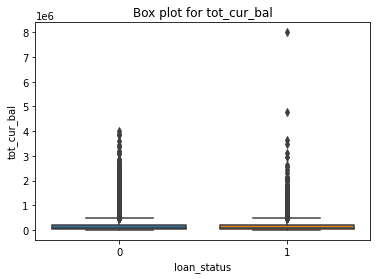

In [ ]:
sns.boxplot(data=data, y="tot_cur_bal", x="loan_status").set_title('Box plot for tot_cur_bal')

In [16]:
data.describe()

member_id      loan_amnt    funded_amnt  funded_amnt_inv  \
count  5.324280e+05  532428.000000  532428.000000    532428.000000   
mean   3.500547e+07   14757.595722   14744.271291     14704.926696   
std    2.412148e+07    8434.420080    8429.139277      8441.290381   
min    7.047300e+04     500.000000     500.000000         0.000000   
25%    1.086688e+07    8000.000000    8000.000000      8000.000000   
50%    3.709590e+07   13000.000000   13000.000000     13000.000000   
75%    5.848920e+07   20000.000000   20000.000000     20000.000000   
max    7.354484e+07   35000.000000   35000.000000     35000.000000   

                term       int_rate    annual_inc            dti  \
count  532428.000000  532428.000000  5.324250e+05  532428.000000   
mean       43.195790      13.242969  7.502984e+04      18.138767   
std        10.996354       4.379611  6.519985e+04       8.369074   
min        36.000000       5.320000  1.200000e+03       0.000000   
25%        36.000000       9.990000  4.500000e+04      11.930000   
50%        36.000000      12.990000  6.500000e+04      17.650000   
75%        60.000000      16.200000  9.000000e+04      23.950000   
max        60.000000      28.990000  9.500000e+06     672.520000   

         delinq_2yrs  inq_last_6mths  ...  total_rec_late_fee     recoveries  \
count  532412.000000   532412.000000  ...       532428.000000  532428.000000   
mean        0.314448        0.694603  ...            0.394954      45.717832   
std         0.860045        0.997025  ...            4.091546     409.647467   
min         0.000000        0.000000  ...            0.000000       0.000000   
25%         0.000000        0.000000  ...            0.000000       0.000000   
50%         0.000000        0.000000  ...            0.000000       0.000000   
75%         0.000000        1.000000  ...            0.000000       0.000000   
max        30.000000       31.000000  ...          358.680000   33520.270000   

       collection_recovery_fee  collections_12_mths_ex_med  \
count            532428.000000               532333.000000   
mean                  4.859221                    0.014299   
std                  63.123361                    0.133005   
min                   0.000000                    0.000000   
25%                   0.000000                    0.000000   
50%                   0.000000                    0.000000   
75%                   0.000000                    0.000000   
max                7002.190000                   16.000000   

       mths_since_last_major_derog  acc_now_delinq   tot_coll_amt  \
count                132980.000000   532412.000000  490424.000000   
mean                     44.121462        0.005015     213.562222   
std                      22.198410        0.079117    1958.571538   
min                       0.000000        0.000000       0.000000   
25%                      27.000000        0.000000       0.000000   
50%                      44.000000        0.000000       0.000000   
75%                      61.000000        0.000000       0.000000   
max                     180.000000       14.000000  496651.000000   

        tot_cur_bal  total_rev_hi_lim    loan_status  
count  4.904240e+05      4.904240e+05  532428.000000  
mean   1.395541e+05      3.208057e+04       0.236327  
std    1.539149e+05      3.805304e+04       0.424826  
min    0.000000e+00      0.000000e+00       0.000000  
25%    2.983975e+04      1.400000e+04       0.000000  
50%    8.066950e+04      2.370000e+04       0.000000  
75%    2.084792e+05      3.980000e+04       0.000000  
max    8.000078e+06      9.999999e+06       1.000000  

[8 rows x 28 columns]

In [17]:
data.nunique()

member_id                      532428
loan_amnt                        1370
funded_amnt                      1370
funded_amnt_inv                  6442
term                                2
batch_enrolled                    104
int_rate                          535
grade                               7
sub_grade                          35
emp_title                      190124
emp_length                         11
home_ownership                      6
annual_inc                      33988
verification_status                 3
pymnt_plan                          2
desc                            70638
purpose                            14
title                           39693
zip_code                          917
addr_state                         51
dti                              4058
delinq_2yrs                        26
inq_last_6mths                     23
mths_since_last_delinq            147
mths_since_last_record            122
open_acc                           73
pub_rec     

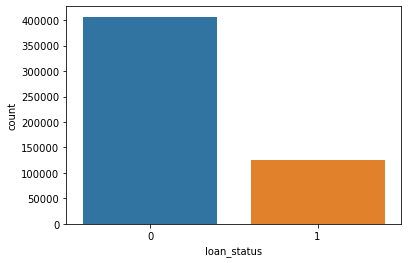

In [18]:
sns.countplot(x="loan_status",data=data)

In [19]:
data["loan_status"].value_counts(normalize=True) * 100

0    76.367321
1    23.632679
Name: loan_status, dtype: float64

In [20]:
data.corr()

member_id  loan_amnt  funded_amnt  \
member_id                     1.000000   0.065607     0.067888   
loan_amnt                     0.065607   1.000000     0.999276   
funded_amnt                   0.067888   0.999276     1.000000   
funded_amnt_inv               0.073426   0.997124     0.998041   
term                          0.069739   0.411912     0.411001   
int_rate                     -0.141030   0.145037     0.145222   
annual_inc                    0.034649   0.330655     0.330493   
dti                           0.134179   0.041866     0.042699   
delinq_2yrs                   0.049956  -0.000454    -0.000171   
inq_last_6mths               -0.127644  -0.033693    -0.034298   
mths_since_last_delinq       -0.008538  -0.038069    -0.038058   
mths_since_last_record       -0.161942  -0.012130    -0.012119   
open_acc                      0.087966   0.197630     0.198078   
pub_rec                       0.080268  -0.080952    -0.080613   
revol_bal                     0.035607   0.333944     0.333785   
revol_util                   -0.053282   0.119956     0.120507   
total_acc                     0.030643   0.220704     0.220597   
total_rec_int                -0.461192   0.532580     0.531616   
total_rec_late_fee           -0.075700   0.031374     0.031022   
recoveries                   -0.113868   0.073326     0.072895   
collection_recovery_fee      -0.072498   0.052995     0.052797   
collections_12_mths_ex_med    0.051447  -0.014822    -0.014663   
mths_since_last_major_derog   0.056741  -0.037226    -0.037214   
acc_now_delinq                0.017607   0.003196     0.003298   
tot_coll_amt                  0.026725  -0.019994    -0.019994   
tot_cur_bal                   0.007278   0.327957     0.327955   
total_rev_hi_lim              0.046108   0.307989     0.307988   
loan_status                  -0.489753  -0.095713    -0.097563   

                             funded_amnt_inv      term  int_rate  annual_inc  \
member_id                           0.073426  0.069739 -0.141030    0.034649   
loan_amnt                           0.997124  0.411912  0.145037    0.330655   
funded_amnt                         0.998041  0.411001  0.145222    0.330493   
funded_amnt_inv                     1.000000  0.411672  0.145251    0.329495   
term                                0.411672  1.000000  0.427560    0.058746   
int_rate                            0.145251  0.427560  1.000000   -0.072061   
annual_inc                          0.329495  0.058746 -0.072061    1.000000   
dti                                 0.044952  0.104824  0.163206   -0.175867   
delinq_2yrs                         0.000280 -0.000348  0.056767    0.047873   
inq_last_6mths                     -0.038378 -0.003663  0.228596    0.033426   
mths_since_last_delinq             -0.035713 -0.006586 -0.032966   -0.051903   
mths_since_last_record              0.007380  0.036142  0.027094   -0.104513   
open_acc                            0.198672  0.085095 -0.009115    0.134948   
pub_rec                            -0.079552 -0.025911  0.052291   -0.007829   
revol_bal                           0.331935  0.091658 -0.035814    0.297585   
revol_util                          0.121167  0.085920  0.269350    0.037232   
total_acc                           0.220762  0.101235 -0.037465    0.183933   
total_rec_int                       0.529116  0.381977  0.445634    0.127483   
total_rec_late_fee                  0.027770  0.005276  0.056141    0.013254   
recoveries                          0.071242  0.057592  0.107292    0.007190   
collection_recovery_fee             0.050261  0.035693  0.071187    0.006332   
collections_12_mths_ex_med         -0.014240 -0.003565  0.013924   -0.003960   
mths_since_last_major_derog        -0.037181 -0.006913 -0.013878   -0.039256   
acc_now_delinq                      0.003473  0.005256  0.026984    0.014906   
tot_coll_amt                       -0.019995 -0.009502  0.002744    0.000196   
tot_cur_bal                       

C:\Users\91974\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\91974\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\91974\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\91974\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\91974\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\91974\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Defa

Wall time: 33min 57s


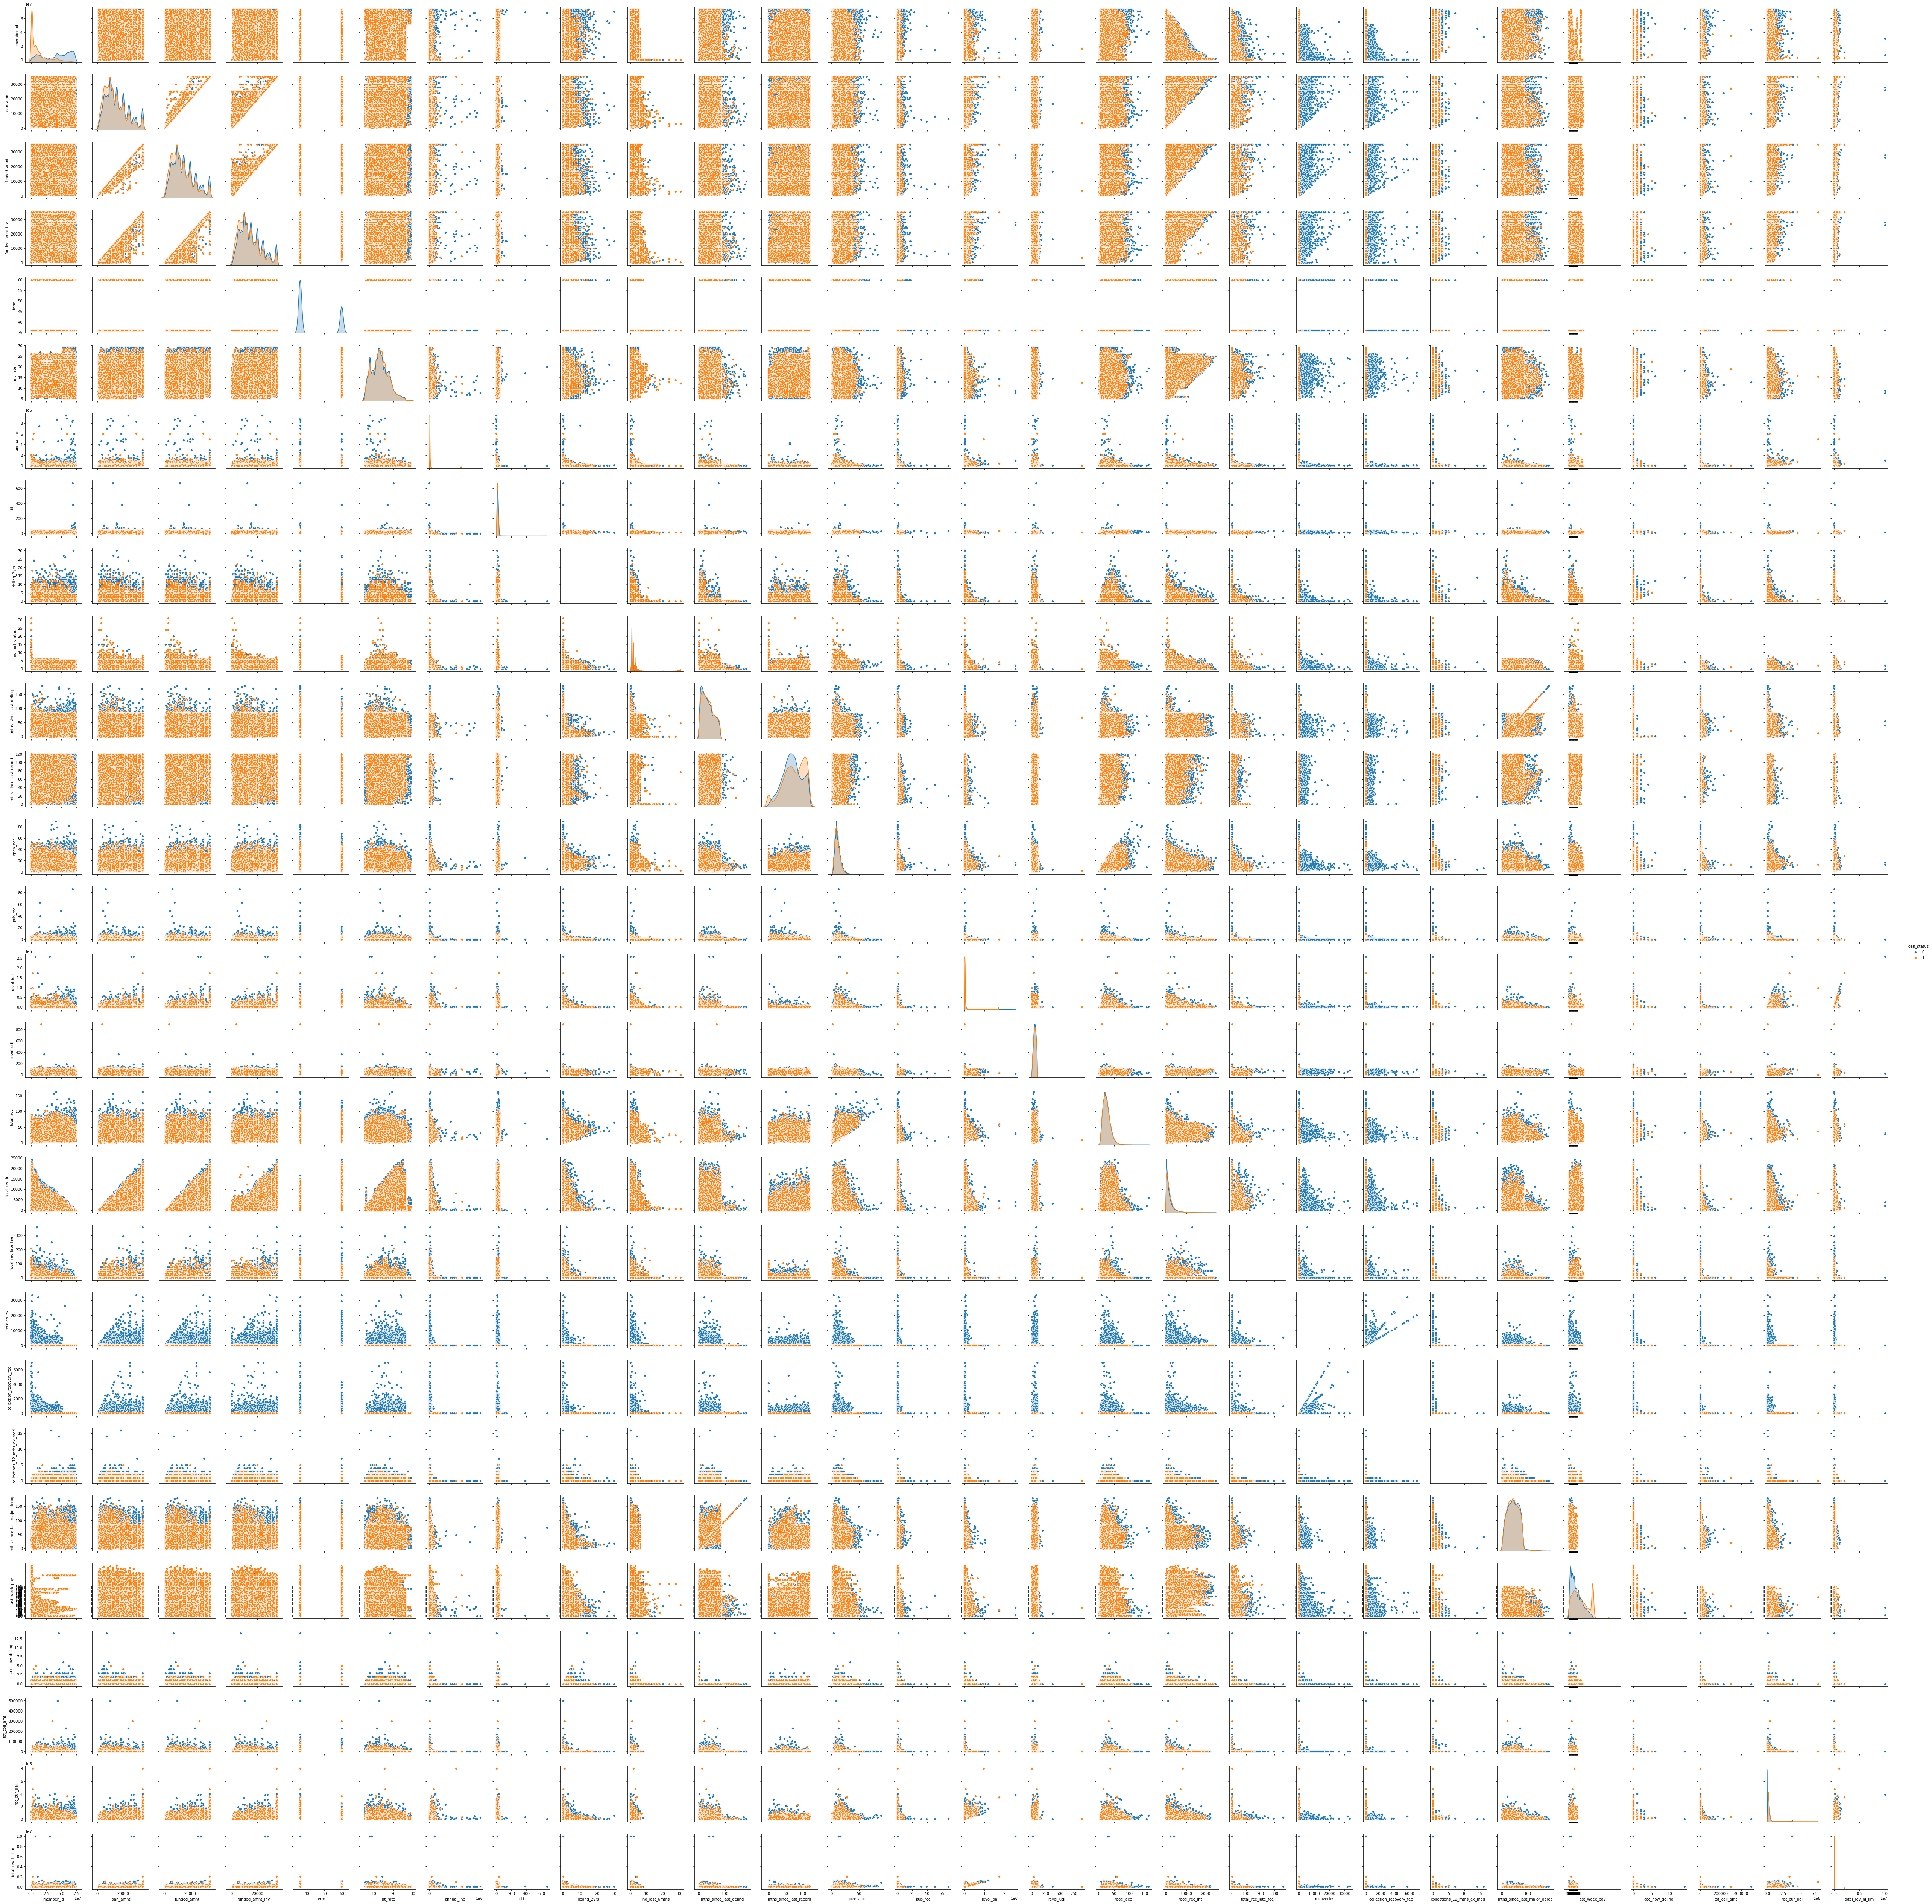

In [21]:
%%time
sns.pairplot(data,hue="loan_status")

In [22]:
# data["annual_inc"] = data.groupby("loan_status").transform(lambda x: x.fillna(x.median()))

### Handling missing values 

In [24]:
data["batch_enrolled"].fillna("New_Category",inplace =True)

data["emp_title"].fillna(data["emp_title"].mode().iloc[0],inplace =True)

data["emp_length"].fillna(data["emp_length"].mode().iloc[0],inplace =True)

data["annual_inc"].fillna(data["annual_inc"].median(),inplace =True)

data["title"].fillna(data["title"].mode().iloc[0],inplace =True)

data["delinq_2yrs"].fillna(data["delinq_2yrs"].mode().iloc[0],inplace =True)

data["inq_last_6mths"].fillna(data["inq_last_6mths"].mode().iloc[0],inplace =True)

data["mths_since_last_delinq"].fillna(data["mths_since_last_delinq"].median(),inplace =True)

data["mths_since_last_record"].fillna(data["mths_since_last_record"].median(),inplace =True)

data["open_acc"].fillna(data["open_acc"].median(),inplace =True)

data["pub_rec"].fillna(data["pub_rec"].median(),inplace =True)

data["revol_util"].fillna(data["revol_util"].median(),inplace =True)

data["total_acc"].fillna(data["total_acc"].median(),inplace =True)

data["collections_12_mths_ex_med"].fillna(data["collections_12_mths_ex_med"].mode().iloc[0],inplace =True)

data["mths_since_last_major_derog"].fillna(data["mths_since_last_major_derog"].median(),inplace =True)

data["last_week_pay"].fillna(data["last_week_pay"].mode().iloc[0],inplace =True)

data["acc_now_delinq"].fillna(data["acc_now_delinq"].mode().iloc[0],inplace =True)

data["tot_coll_amt"].fillna(data["tot_coll_amt"].mode().iloc[0],inplace =True)

data["tot_cur_bal"].fillna(round(data["tot_cur_bal"].mode().iloc[0]),inplace =True)

data["total_rev_hi_lim"].fillna(data["total_rev_hi_lim"].median(),inplace =True)

In [25]:
#Dropping rows with high missing values
data.drop(['desc', 'verification_status_joint'], axis=1, inplace=True)

In [26]:
data.shape

(532428, 43)

In [27]:
data.columns

Index(['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'batch_enrolled', 'int_rate', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'pymnt_plan', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'application_type', 'last_week_pay', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim', 'loan_status'],
      dtype='object')

In [28]:
X = data.iloc[:,1:-1]

In [29]:
X.shape

(532428, 41)

In [30]:
Y = data.iloc[:,-1]

In [31]:
Y.shape

(532428,)

## Train-Test Split 

In [32]:
# split into train test sets
X_train, X_cv, Y_train, Y_cv = train_test_split(X, Y, test_size=0.3, random_state=42)

In [33]:
print("Shape of X_train :",X_train.shape)
print("Shape of Y_train :",Y_train.shape)
print("Shape of X_cv :",X_cv.shape)
print("Shape of Y_cv :",Y_cv.shape)

Shape of X_train : (372699, 41)
Shape of Y_train : (372699,)
Shape of X_cv : (159729, 41)
Shape of Y_cv : (159729,)


## Data Preparation(Vectorization and Standardisation)

In [34]:
scaler1 = StandardScaler()
loan_amnt_train = scaler1.fit_transform(X_train["loan_amnt"].values.reshape(-1, 1))
loan_amnt_cv = scaler1.transform(X_cv["loan_amnt"].values.reshape(-1, 1))

In [35]:
scaler2 = StandardScaler()
funded_amnt_train = scaler2.fit_transform(X_train["funded_amnt"].values.reshape(-1, 1))
funded_amnt_cv = scaler2.transform(X_cv["funded_amnt"].values.reshape(-1, 1))

In [36]:
scaler3 = StandardScaler()
funded_amnt_inv_train = scaler3.fit_transform(X_train["funded_amnt_inv"].values.reshape(-1, 1))
funded_amnt_inv_cv = scaler3.transform(X_cv["funded_amnt_inv"].values.reshape(-1, 1))

In [37]:
scaler4 = StandardScaler()
funded_amnt_train = scaler4.fit_transform(X_train["funded_amnt"].values.reshape(-1, 1))
funded_amnt_cv = scaler4.transform(X_cv["funded_amnt"].values.reshape(-1, 1))

In [38]:
scaler5 = StandardScaler()
term_train = scaler5.fit_transform(X_train["term"].values.reshape(-1, 1))
term_cv = scaler5.transform(X_cv["term"].values.reshape(-1, 1))

In [39]:
enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
batch_enrolled_train = enc.fit_transform(X_train["batch_enrolled"].values.reshape(-1, 1))
batch_enrolled_cv = enc.transform(X_cv["batch_enrolled"].values.reshape(-1, 1))

In [40]:
scaler6 = StandardScaler()
int_rate_train = scaler6.fit_transform(X_train["int_rate"].values.reshape(-1, 1))
int_rate_cv = scaler6.transform(X_cv["int_rate"].values.reshape(-1, 1))

In [41]:
ohe1 = OneHotEncoder()
grade_train = ohe1.fit_transform(X_train["grade"].values.reshape(-1, 1))
grade_cv = ohe1.transform(X_cv["grade"].values.reshape(-1, 1))

In [42]:
le2 = preprocessing.LabelEncoder()
sub_grade_train = le2.fit_transform(X_train["sub_grade"]).reshape(-1, 1)
sub_grade_cv = le2.transform(X_cv["sub_grade"]).reshape(-1, 1)

In [43]:
enc1 = OrdinalEncoder(categories = [data['emp_title'].value_counts().index.tolist()], handle_unknown='use_encoded_value', unknown_value=-1)
emp_title_train= enc1.fit_transform(X_train['emp_title'].values.reshape(-1, 1))
emp_title_cv= enc1.transform(X_cv['emp_title'].values.reshape(-1, 1))

In [44]:
ohe2 = OneHotEncoder(handle_unknown='ignore')
emp_length_train = ohe2.fit_transform(X_train["emp_length"].values.reshape(-1, 1))
emp_length_cv = ohe2.transform(X_cv["emp_length"].values.reshape(-1, 1))

In [45]:
ohe3 = OneHotEncoder()
home_ownership_train = ohe3.fit_transform(X_train["home_ownership"].values.reshape(-1, 1))
home_ownership_cv = ohe3.transform(X_cv["home_ownership"].values.reshape(-1, 1))

In [46]:
scaler7 = StandardScaler()
annual_inc_train = scaler7.fit_transform(X_train["annual_inc"].values.reshape(-1, 1))
annual_inc_cv = scaler7.transform(X_cv["annual_inc"].values.reshape(-1, 1))

In [47]:
ohe4 = OneHotEncoder()
verification_status_train = ohe4.fit_transform(X_train["verification_status"].values.reshape(-1, 1))
verification_status_cv = ohe4.transform(X_cv["verification_status"].values.reshape(-1, 1))

In [48]:
ohe5 = OneHotEncoder()
pymnt_plan_train = ohe5.fit_transform(X_train["pymnt_plan"].values.reshape(-1, 1))
pymnt_plan_cv = ohe5.transform(X_cv["pymnt_plan"].values.reshape(-1, 1))

In [49]:
le3 = preprocessing.LabelEncoder()
purpose_train = le3.fit_transform(X_train["purpose"]).reshape(-1, 1)
purpose_cv = le3.transform(X_cv["purpose"]).reshape(-1, 1)

In [50]:
enc2 = OrdinalEncoder(categories = [data['title'].value_counts().index.tolist()], handle_unknown='use_encoded_value', unknown_value=-1 )

title_train= enc2.fit_transform(X_train['title'].values.reshape(-1, 1))
title_cv= enc2.transform(X_cv['title'].values.reshape(-1, 1))

In [51]:
enc3 = OrdinalEncoder(categories = [data['zip_code'].value_counts().index.tolist()],handle_unknown='use_encoded_value', unknown_value=-1 )

zip_code_train= enc3.fit_transform(X_train['zip_code'].values.reshape(-1, 1))
zip_code_cv= enc3.transform(X_cv['zip_code'].values.reshape(-1, 1))

In [52]:
le4 = preprocessing.LabelEncoder()
addr_state_train = le4.fit_transform(X_train["addr_state"]).reshape(-1, 1)
addr_state_cv = le4.transform(X_cv["addr_state"]).reshape(-1, 1)

In [53]:
scaler8 = StandardScaler()
dti_train = scaler8.fit_transform(X_train["dti"].values.reshape(-1, 1))
dti_cv = scaler8.transform(X_cv["dti"].values.reshape(-1, 1))

In [54]:
scaler9 = StandardScaler()
delinq_2yrs_train = scaler9.fit_transform(X_train["delinq_2yrs"].values.reshape(-1, 1))
delinq_2yrs_cv = scaler9.transform(X_cv["delinq_2yrs"].values.reshape(-1, 1))

In [55]:
scaler10 = StandardScaler()
inq_last_6mths_train = scaler10.fit_transform(X_train["inq_last_6mths"].values.reshape(-1, 1))
inq_last_6mths_cv = scaler10.transform(X_cv["inq_last_6mths"].values.reshape(-1, 1))

In [56]:
scaler11 = StandardScaler()
mths_since_last_delinq_train = scaler11.fit_transform(X_train["mths_since_last_delinq"].values.reshape(-1, 1))
mths_since_last_delinq_cv = scaler11.transform(X_cv["mths_since_last_delinq"].values.reshape(-1, 1))

In [57]:
scaler12 = StandardScaler()
mths_since_last_record_train = scaler12.fit_transform(X_train["mths_since_last_record"].values.reshape(-1, 1))
mths_since_last_record_cv = scaler12.transform(X_cv["mths_since_last_record"].values.reshape(-1, 1))

In [58]:
scaler13 = StandardScaler()
open_acc_train = scaler13.fit_transform(X_train["open_acc"].values.reshape(-1, 1))
open_acc_cv = scaler13.transform(X_cv["open_acc"].values.reshape(-1, 1))

In [59]:
scaler14 = StandardScaler()
pub_rec_train = scaler14.fit_transform(X_train["pub_rec"].values.reshape(-1, 1))
pub_rec_cv = scaler14.transform(X_cv["pub_rec"].values.reshape(-1, 1))

In [60]:
scaler15 = StandardScaler()
revol_bal_train = scaler15.fit_transform(X_train["revol_bal"].values.reshape(-1, 1))
revol_bal_cv = scaler15.transform(X_cv["revol_bal"].values.reshape(-1, 1))

In [61]:
scaler16 = StandardScaler()
revol_util_train = scaler16.fit_transform(X_train["revol_util"].values.reshape(-1, 1))
revol_util_cv = scaler16.transform(X_cv["revol_util"].values.reshape(-1, 1))

In [62]:
scaler17 = StandardScaler()
total_acc_train = scaler17.fit_transform(X_train["total_acc"].values.reshape(-1, 1))
total_acc_cv = scaler17.transform(X_cv["total_acc"].values.reshape(-1, 1))

In [63]:
ohe6 = OneHotEncoder()
initial_list_status_train = ohe6.fit_transform(X_train["initial_list_status"].values.reshape(-1, 1))
initial_list_status_cv = ohe6.transform(X_cv["initial_list_status"].values.reshape(-1, 1))

In [64]:
scaler18 = StandardScaler()
total_rec_int_train = scaler18.fit_transform(X_train["total_rec_int"].values.reshape(-1, 1))
total_rec_int_cv = scaler18.transform(X_cv["total_rec_int"].values.reshape(-1, 1))

In [65]:
scaler19 = StandardScaler()
total_rec_late_fee_train = scaler19.fit_transform(X_train["total_rec_late_fee"].values.reshape(-1, 1))
total_rec_late_fee_cv = scaler19.transform(X_cv["total_rec_late_fee"].values.reshape(-1, 1))

In [66]:
scaler20 = StandardScaler()
recoveries_train = scaler20.fit_transform(X_train["recoveries"].values.reshape(-1, 1))
recoveries_cv = scaler20.transform(X_cv["recoveries"].values.reshape(-1, 1))

In [67]:
scaler21 = StandardScaler()
collection_recovery_fee_train = scaler21.fit_transform(X_train["collection_recovery_fee"].values.reshape(-1, 1))
collection_recovery_fee_cv = scaler21.transform(X_cv["collection_recovery_fee"].values.reshape(-1, 1))

In [68]:
scaler22 = StandardScaler()
collections_12_mths_ex_med_train = scaler22.fit_transform(X_train["collections_12_mths_ex_med"].values.reshape(-1, 1))
collections_12_mths_ex_med_cv = scaler22.transform(X_cv["collections_12_mths_ex_med"].values.reshape(-1, 1))

In [69]:
scaler23 = StandardScaler()
total_rec_late_fee_train = scaler23.fit_transform(X_train["collection_recovery_fee"].values.reshape(-1, 1))
total_rec_late_fee_cv = scaler23.transform(X_cv["collection_recovery_fee"].values.reshape(-1, 1))

In [70]:
scaler24 = StandardScaler()
mths_since_last_major_derog_train = scaler24.fit_transform(X_train["mths_since_last_major_derog"].values.reshape(-1, 1))
mths_since_last_major_derog_cv = scaler24.transform(X_cv["mths_since_last_major_derog"].values.reshape(-1, 1))

In [71]:
ohe7 = OneHotEncoder()
application_type_train = ohe7.fit_transform(X_train["application_type"].values.reshape(-1, 1))
application_type_cv = ohe7.transform(X_cv["application_type"].values.reshape(-1, 1))

In [72]:
scaler25 = StandardScaler()
last_week_pay_train = scaler25.fit_transform(X_train["last_week_pay"].values.reshape(-1, 1))
last_week_pay_cv = scaler25.transform(X_cv["last_week_pay"].values.reshape(-1, 1))

In [73]:
scaler26 = StandardScaler()
acc_now_delinq_train = scaler26.fit_transform(X_train["acc_now_delinq"].values.reshape(-1, 1))
acc_now_delinq_cv = scaler26.transform(X_cv["acc_now_delinq"].values.reshape(-1, 1))

In [74]:
scaler27 = StandardScaler()
tot_coll_amt_train = scaler27.fit_transform(X_train["tot_coll_amt"].values.reshape(-1, 1))
tot_coll_amt_cv = scaler27.transform(X_cv["tot_coll_amt"].values.reshape(-1, 1))

In [75]:
scaler28 = StandardScaler()
tot_cur_bal_train = scaler28.fit_transform(X_train["tot_cur_bal"].values.reshape(-1, 1))
tot_cur_bal_cv = scaler28.transform(X_cv["tot_cur_bal"].values.reshape(-1, 1))

In [76]:
scaler29 = StandardScaler()
total_rev_hi_lim_train = scaler29.fit_transform(X_train["total_rev_hi_lim"].values.reshape(-1, 1))
total_rev_hi_lim_cv = scaler29.transform(X_cv["total_rev_hi_lim"].values.reshape(-1, 1))

In [77]:
X_train = hstack((loan_amnt_train,funded_amnt_train,funded_amnt_inv_train,term_train,batch_enrolled_train,int_rate_train,
                 grade_train,sub_grade_train,emp_title_train,emp_length_train,home_ownership_train,annual_inc_train,
                 verification_status_train, pymnt_plan_train,purpose_train,title_train,zip_code_train,addr_state_train,
                 dti_train,delinq_2yrs_train,inq_last_6mths_train,mths_since_last_delinq_train,
                 mths_since_last_record_train,open_acc_train,pub_rec_train,revol_bal_train,revol_util_train,
                 total_acc_train,initial_list_status_train,total_rec_int_train,total_rec_late_fee_train,recoveries_train,
                 collection_recovery_fee_train,collections_12_mths_ex_med_train,mths_since_last_major_derog_train,
                 application_type_train,last_week_pay_train,acc_now_delinq_train,tot_coll_amt_train,tot_cur_bal_train,
                 total_rev_hi_lim_train)).tocsr()

X_cv = hstack((loan_amnt_cv,funded_amnt_cv,funded_amnt_inv_cv,term_cv,batch_enrolled_cv,int_rate_cv,grade_cv,
               sub_grade_cv,emp_title_cv,emp_length_cv,home_ownership_cv,annual_inc_cv,verification_status_cv,
               pymnt_plan_cv,purpose_cv,title_cv,zip_code_cv,addr_state_cv,dti_cv,delinq_2yrs_cv,inq_last_6mths_cv,
               mths_since_last_delinq_cv,mths_since_last_record_cv,open_acc_cv,pub_rec_cv, revol_bal_cv,revol_util_cv,
               total_acc_cv,initial_list_status_cv,total_rec_int_cv,total_rec_late_fee_cv, recoveries_cv,
               collection_recovery_fee_cv,collections_12_mths_ex_med_cv,mths_since_last_major_derog_cv, 
               application_type_cv,last_week_pay_cv,acc_now_delinq_cv,tot_coll_amt_cv,tot_cur_bal_cv, 
               total_rev_hi_lim_cv)).tocsr()

In [78]:
X_train.shape

(372699, 67)

## Data Visualisation 

shape of pca_reduced.shape =  (372699, 2)


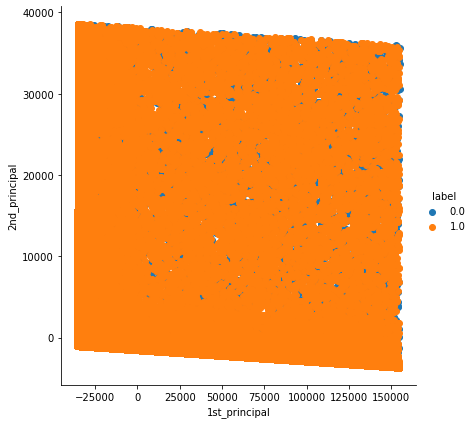

Wall time: 12.2 s


In [79]:
%%time
# initializing the pca

pca = decomposition.PCA()
# configuring the parameteres
# the number of components = 2
pca.n_components = 2
pca_data = pca.fit_transform(X_train.toarray())

# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ", pca_data.shape)

# attaching the label for each 2-d data point 
pca_data = np.vstack((pca_data.T, Y_train)).T

# creating a new data fram which help us in ploting the result data
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
sns.FacetGrid(pca_df, hue="label", height=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

## Data Modelling and training

### XG Boost 

In [80]:
%%time
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]   ,
 "n_estimators"     : [ 25,50,75,100,125,150,175,200 ]
}

random_search = RandomizedSearchCV(XGBClassifier(),param_distributions=params,n_iter=5,n_jobs=-1,
                        cv=StratifiedKFold(n_splits=5),verbose=3,scoring='roc_auc',return_train_score=True,refit=True)
random_search.fit(X_train,Y_train)


Fitting 5 folds for each of 5 candidates, totalling 25 fits


C:\Users\91974\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:02:04] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Wall time: 22min 16s


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=No...
                                           validate_parameters=None,
                                           verbosity=None),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                       

In [81]:
print(random_search.best_estimator_)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [82]:
print(random_search.best_params_)

{'n_estimators': 100, 'min_child_weight': 1, 'max_depth': 10, 'learning_rate': 0.25, 'gamma': 0.0, 'colsample_bytree': 0.7}


In [83]:
pd.DataFrame(random_search.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0     188.811540     26.841968         1.213154        0.367401   
1      17.346479      1.806326         0.224768        0.040695   
2     387.635661     24.456360         0.555544        0.037878   
3      65.055194      5.320274         0.263381        0.029004   
4     162.638161     40.328906         0.447422        0.104184   

  param_n_estimators param_min_child_weight param_max_depth  \
0                 75                      3              10   
1                 25                      5               3   
2                100                      1              10   
3                100                      3               3   
4                175                      7               6   

  param_learning_rate param_gamma param_colsample_bytree  ... mean_test_score  \
0                0.25         0.3                    0.3  ...        0.954384   
1                 0.3         0.4                    0.4  ...        0.843961   
2                0.25           0                    0.7  ...        0.962839   
3                 0.1           0                    0.7  ...        0.874531   
4                 0.1           0                    0.5  ...        0.954090   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.001104                2            0.982230            0.982077   
1        0.003118                5            0.841567            0.846677   
2        0.000710                1            0.991686            0.991170   
3        0.003457                4            0.881690            0.879347   
4        0.001158                3            0.958921            0.957936   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.982391            0.981479            0.981935   
1            0.845110            0.844286            0.845950   
2            0.989857            0.990369            0.991565   
3            0.868463            0.873700            0.875615   
4            0.958459            0.958877            0.958346   

   mean_train_score  std_train_score  
0          0.982023         0.000311  
1          0.844718         0.001768  
2          0.990929         0.000707  
3          0.875763         0.004594  
4          0.958508         0.000364  

[5 rows x 26 columns]

In [84]:
%%time
xgreg = XGBClassifier(n_estimators = 150, min_child_weight = 1, max_depth = 6, learning_rate = 0.15, gamma = 0.2, colsample_bytree = 0.5)
xgreg.fit(X_train,Y_train)

C:\Users\91974\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:04:00] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Wall time: 1min 4s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=150, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [85]:
predictions_train_xgb = xgreg.predict (X_train)
predictions_xgb = xgreg.predict (X_cv)

In [86]:
roc_train_xgb = roc_auc_score(Y_train, predictions_train_xgb)
print("ROC_AUC for train data: ", roc_train_xgb)

roc_cv_xgb = roc_auc_score(Y_cv,predictions_xgb)
print("ROC_AUC for cv data: ", roc_cv_xgb)

ROC_AUC for train data:  0.8621891587016334
ROC_AUC for cv data:  0.8581223982045237


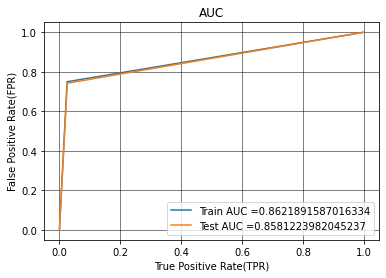

In [87]:
train_fpr, train_tpr, tr_thresholds = roc_curve(Y_train, predictions_train_xgb)
test_fpr, test_tpr, te_thresholds = roc_curve(Y_cv, predictions_xgb)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

In [88]:
print(classification_report(Y_train,predictions_train_xgb))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95    284588
           1       0.90      0.75      0.82     88111

    accuracy                           0.92    372699
   macro avg       0.91      0.86      0.88    372699
weighted avg       0.92      0.92      0.92    372699



In [89]:
print("Train confusion matrix")
print(confusion_matrix(Y_train, predictions_train_xgb))

print("CV confusion matrix")
print(confusion_matrix(Y_cv, predictions_xgb))

Train confusion matrix
[[277407   7181]
 [ 22062  66049]]
CV confusion matrix
[[118852   3161]
 [  9725  27991]]


### Random Forest 

In [90]:
%%time
tuned_parameters = {'n_estimators': [100, 200, 300, 400], 
                    'max_depth': [  4, 5, 6],     
                    'min_samples_split': [2, 3]}
rf_random = RandomizedSearchCV(RandomForestClassifier(), tuned_parameters, n_jobs=-1,verbose=3,
                               cv=StratifiedKFold(n_splits=5),scoring='roc_auc',return_train_score=True,refit=True)
rf_random.fit(X_train, Y_train)
print(rf_random.best_estimator_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
RandomForestClassifier(max_depth=6, n_estimators=300)
Wall time: 1h 15min 47s


In [91]:
print(rf_random.best_params_)

{'n_estimators': 300, 'min_samples_split': 2, 'max_depth': 6}


In [92]:
pd.DataFrame(rf_random.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0     117.288540      0.759488         1.762825        0.058854   
1     466.358878      6.468911         5.356834        0.074574   
2     348.851758      1.877222         6.662739        0.266940   
3     360.615531      2.992928         5.328163        0.205121   
4      89.071527      1.405309         1.827312        0.175801   
5     183.359120      6.391056         3.920098        0.975182   
6     109.837760      5.398671         2.917557        0.063736   
7     701.664666     19.829665         7.410976        0.236784   
8     121.433687      1.700790         1.826716        0.047844   
9     445.296487     55.830695         6.586391        0.585130   

  param_n_estimators param_min_samples_split param_max_depth  \
0                100                       3               5   
1                300                       2               6   
2                400                       3               4   
3                300                       2               5   
4                100                       3               4   
5                200                       2               4   
6                100                       2               4   
7                400                       2               6   
8                100                       2               5   
9                400                       2               5   

                                              params  split0_test_score  \
0  {'n_estimators': 100, 'min_samples_split': 3, ...           0.805582   
1  {'n_estimators': 300, 'min_samples_split': 2, ...           0.813939   
2  {'n_estimators': 400, 'min_samples_split': 3, ...           0.796178   
3  {'n_estimators': 300, 'min_samples_split': 2, ...           0.805093   
4  {'n_estimators': 100, 'min_samples_split': 3, ...           0.798194   
5  {'n_estimators': 200, 'min_samples_split': 2, ...           0.795865   
6  {'n_estimators': 100, 'min_samples_split': 2, ...           0.794134   
7  {'n_estimators': 400, 'min_samples_split': 2, ...           0.812431   
8  {'n_estimators': 100, 'min_samples_split': 2, ...           0.802915   
9  {'n_estimators': 400, 'min_samples_split': 2, ...           0.805306   

   split1_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0           0.804197  ...         0.804917        0.002132                4   
1           0.813458  ...         0.813852        0.001392                1   
2           0.795711  ...         0.795781        0.001656                9   
3           0.806719  ...         0.804916        0.002013                5   
4           0.798550  ...         0.796590        0.002554                8   
5           0.797911  ...         0.796857        0.001849                7   
6           0.792539  ...         0.795645        0.002670               10   
7           0.814470  ...         0.813457        0.001512                2   
8           0.808065  ...         0.804477        0.002794                6   
9           0.806945  ...         0.805210        0.001598                3   

   split0_train_score  split1_train_score  split2_train_score  \
0            0.806757            0.805001            0.805628   
1            0.815834            0.814704            0.813882   
2            0.796770            0.796138            0.795964   
3            0.806166            0.807272            0.805124   
4            0.798863            0.799457            0.796013   
5            0.796080            0.798423            0.797415   
6            0.794546            0.793121            0.798261   
7            0.814319            0.815572            0.813804   
8            0.803864            0.808792            0.804328   
9            0.806623            0.807558            0.803852   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0            0.806857            0.805524          0.805953         0

In [93]:
%%time
rf_clf = RandomForestClassifier(n_estimators = 400, max_depth = 6, min_samples_split = 3)
rf_clf.fit(X_train,Y_train)

Wall time: 7min 10s


RandomForestClassifier(max_depth=6, min_samples_split=3, n_estimators=400)

In [94]:
predictions_train_rf = rf_clf.predict (X_train)
predictions_rf = rf_clf.predict (X_cv)

In [95]:
roc_train_rf = roc_auc_score(Y_train, predictions_train_rf)
print("ROC_AUC for train data: ", roc_train_rf)

roc_cv_rf = roc_auc_score(Y_cv,predictions_rf)
print("ROC_AUC for cv data: ", roc_cv_rf)

ROC_AUC for train data:  0.6486045066749061
ROC_AUC for cv data:  0.6455159494135365


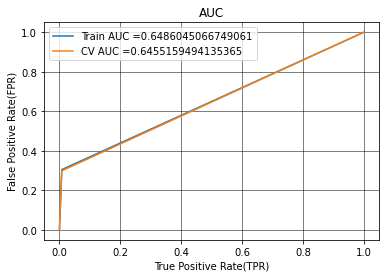

In [96]:
train_fpr, train_tpr, tr_thresholds = roc_curve(Y_train, predictions_train_rf)
test_fpr, test_tpr, te_thresholds = roc_curve(Y_cv, predictions_rf)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="CV AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

In [97]:
print(classification_report(Y_train,predictions_train_rf))

              precision    recall  f1-score   support

           0       0.82      0.99      0.90    284588
           1       0.92      0.30      0.46     88111

    accuracy                           0.83    372699
   macro avg       0.87      0.65      0.68    372699
weighted avg       0.85      0.83      0.79    372699



In [98]:
print("Train confusion matrix")
print(confusion_matrix(Y_train, predictions_train_rf))

print("CV confusion matrix")
print(confusion_matrix(Y_cv, predictions_rf))

Train confusion matrix
[[282380   2208]
 [ 61240  26871]]
CV confusion matrix
[[121054    959]
 [ 26443  11273]]


### Light GBM 

In [99]:
%%time
param_dist = {"n_estimators":sp_randint(105,125),
              "max_depth": sp_randint(10,15),
              "min_samples_split": sp_randint(110,190),
              "min_samples_leaf": sp_randint(25,65)}

lgb_random = RandomizedSearchCV(lgb.LGBMClassifier(), param_distributions=param_dist,n_iter=5,n_jobs=-1,cv=StratifiedKFold(n_splits=5),
                                verbose=3,scoring='roc_auc',return_train_score=True,refit=True)

lgb_random.fit(X_train,Y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[LightGBM] [Warning] Unknown parameter: min_samples_leaf
[LightGBM] [Warning] Unknown parameter: min_samples_split
Wall time: 3min 14s


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=LGBMClassifier(), n_iter=5, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000018151A302E0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000018155538C10>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000018155520F70>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000018157547940>},
                   return_train_score=True, scoring='roc_auc', verbose=3)

In [100]:
lgb_random.best_estimator_

LGBMClassifier(max_depth=10, min_samples_leaf=30, min_samples_split=127,
               n_estimators=112)

In [101]:
lgb_random.best_params_

{'max_depth': 10,
 'min_samples_leaf': 30,
 'min_samples_split': 127,
 'n_estimators': 112}

In [102]:
pd.DataFrame(lgb_random.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      14.686599      0.160349         1.234525        0.041576   
1      14.391308      0.142220         1.229314        0.047990   
2      14.508226      0.184128         1.330766        0.157096   
3      14.790277      0.086422         1.304858        0.050742   
4      13.919005      1.112508         1.150137        0.141327   

  param_max_depth param_min_samples_leaf param_min_samples_split  \
0              11                     59                     125   
1              11                     44                     134   
2              10                     43                     122   
3              10                     30                     127   
4              10                     35                     123   

  param_n_estimators                                             params  \
0                108  {'max_depth': 11, 'min_samples_leaf': 59, 'min...   
1                105  {'max_depth': 11, 'min_samples_leaf': 44, 'min...   
2                109  {'max_depth': 10, 'min_samples_leaf': 43, 'min...   
3                112  {'max_depth': 10, 'min_samples_leaf': 30, 'min...   
4                109  {'max_depth': 10, 'min_samples_leaf': 35, 'min...   

   split0_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0           0.949385  ...         0.950823        0.000786                2   
1           0.948635  ...         0.950258        0.000897                5   
2           0.949567  ...         0.950416        0.000943                3   
3           0.949797  ...         0.950859        0.000979                1   
4           0.949567  ...         0.950416        0.000943                3   

   split0_train_score  split1_train_score  split2_train_score  \
0            0.954372            0.952933            0.952803   
1            0.953603            0.952154            0.952474   
2            0.954665            0.951857            0.952937   
3            0.954946            0.952542            0.953307   
4            0.954665            0.951857            0.952937   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0            0.952937            0.952338          0.953077         0.000684  
1            0.952354            0.951680          0.952453         0.000635  
2            0.952403            0.952523          0.952877         0.000958  
3            0.952812            0.953110          0.953343         0.000842  
4            0.952403            0.952523          0.952877         0.000958  

[5 rows x 24 columns]

In [103]:
%%time
lgb_clf = lgb.LGBMClassifier(max_depth = 13,min_samples_leaf = 52,min_samples_split = 131, n_estimators = 119)
lgb_clf.fit(X_train,Y_train)

Wall time: 6.43 s


LGBMClassifier(max_depth=13, min_samples_leaf=52, min_samples_split=131,
               n_estimators=119)

In [104]:
predictions_train_lgb = lgb_clf.predict (X_train)
predictions_lgb = lgb_clf.predict (X_cv)

In [105]:
roc_train_lgb = roc_auc_score(Y_train, predictions_train_lgb)
print("ROC_AUC for train data: ", roc_train_lgb)

roc_cv_lgb = roc_auc_score(Y_cv,predictions_lgb)
print("ROC_AUC for cv data: ", roc_cv_lgb)

ROC_AUC for train data:  0.8407563514581161
ROC_AUC for cv data:  0.8402868118226705


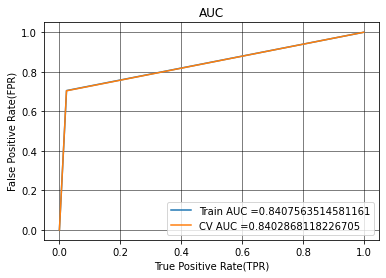

In [106]:
train_fpr, train_tpr, tr_thresholds = roc_curve(Y_train, predictions_train_lgb)
test_fpr, test_tpr, te_thresholds = roc_curve(Y_cv, predictions_lgb)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="CV AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

In [107]:
print(classification_report(Y_train,predictions_train_lgb))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94    284588
           1       0.90      0.70      0.79     88111

    accuracy                           0.91    372699
   macro avg       0.91      0.84      0.87    372699
weighted avg       0.91      0.91      0.91    372699



In [108]:
print("Train confusion matrix")
print(confusion_matrix(Y_train, predictions_train_lgb))

print("CV confusion matrix")
print(confusion_matrix(Y_cv, predictions_lgb))

Train confusion matrix
[[277924   6664]
 [ 25999  62112]]
CV confusion matrix
[[119184   2829]
 [ 11173  26543]]


## Model Comparison

In [148]:
#http://zetcode.com/python/prettytable/
from prettytable import PrettyTable
    
x = PrettyTable()
x.field_names = [ "Model", "Train AUC", "CV AUC"]
x.add_row(["XG Boost",roc_train_xgb, roc_cv_xgb ])
x.add_row(["Random Forest",roc_train_rf, roc_cv_rf ])
x.add_row(["Light GBM", roc_train_lgb, roc_cv_lgb ])

print(x)

+---------------+--------------------+--------------------+
|     Model     |     Train AUC      |       CV AUC       |
+---------------+--------------------+--------------------+
|    XG Boost   | 0.8621891587016334 | 0.8581223982045237 |
| Random Forest | 0.6486045066749061 | 0.6455159494135365 |
|   Light GBM   | 0.8407563514581161 | 0.8402868118226705 |
+---------------+--------------------+--------------------+


## Test Data Preparation 

In [129]:
test = pd.read_csv("test_indessa.csv")

In [130]:
test

member_id  loan_amnt  funded_amnt  funded_amnt_inv       term  \
0        11937648      14000        14000          14000.0  60 months   
1        38983318      16000        16000          16000.0  60 months   
2        27999917      11050        11050          11050.0  60 months   
3        61514932      35000        35000          34700.0  60 months   
4        59622821       6500         6500           6500.0  36 months   
...           ...        ...          ...              ...        ...   
354946   19145105      15000        15000          15000.0  36 months   
354947   46304777      35000        35000          35000.0  60 months   
354948     903745      14000        14000          13975.0  60 months   
354949   53032475      20000        20000          20000.0  36 months   
354950     994245       2700         2700           2450.0  60 months   

       batch_enrolled  int_rate grade sub_grade  \
0          BAT4711174     16.24     C        C5   
1          BAT4318899      9.49     B        B2   
2           BAT446479     15.61     D        D1   
3          BAT4664105     12.69     C        C2   
4                          6.89     A        A3   
...               ...       ...   ...       ...   
354946     BAT4217242      6.49     A        A2   
354947                    25.89     G        G3   
354948     BAT6117184     17.51     E        E4   
354949     BAT3840785      7.26     A        A4   
354950            NaN      7.49     A        A4   

                              emp_title  ... collection_recovery_fee  \
0                          Data Analyst  ...                     0.0   
1         Senior Database Administrator  ...                     0.0   
2       Customer service representative  ...                     0.0   
3                          ACCT OFFICER  ...                     0.0   
4                             Paralegal  ...                     0.0   
...                                 ...  ...                     ...   
354946            Network administrator  ...                     0.0   
354947              Credit Risk Analyst  ...                     0.0   
354948                 USPS/Nashua L&DC  ...                     0.0   
354949                Computer Engineer  ...                     0.0   
354950          Jimmy John's Sandwiches  ...                     0.0   

       collections_12_mths_ex_med  mths_since_last_major_derog  \
0                             0.0                          NaN   
1                             0.0                          NaN   
2                             0.0                         26.0   
3                             0.0                          NaN   
4                             0.0                          NaN   
...                           ...                          ...   
354946                        0.0                         77.0   
354947                        0.0                          NaN   
354948                        0.0                          NaN   
354949                        0.0                          NaN   
354950                        0.0                          NaN   

       application_type verification_status_joint last_week_pay  \
0            INDIVIDUAL                       NaN    104th week   
1            INDIVIDUAL                       NaN     57th week   
2            INDIVIDUAL                       NaN     70th week   
3            INDIVIDUAL                       NaN     22th week   
4            INDIVIDUAL                       NaN     22th week   
...                 ...                       ...           ...   
354946       INDIVIDUAL                       NaN     83th week   
354947       INDIVIDUAL                       NaN     39th week   
354948       INDIVIDUAL                       NaN     87th week   
354949       INDIVIDUAL                       NaN     35th week   
354950       INDIVIDUAL                       NaN    104th week   

       acc_now_delinq tot_coll_amt tot_cur_bal total_re

In [131]:
member_id = test["member_id"]

In [132]:
#removal of text from continuous data
test["term"] = test["term"].str.extract('(\d+)').astype(int)
test["last_week_pay"] = test["last_week_pay"].str.extract('(\d+)')

In [133]:
#filling of mivving value
test["batch_enrolled"].fillna("New_Category",inplace =True)
test["emp_title"].fillna(data["emp_title"].mode().iloc[0],inplace =True)
test["emp_length"].fillna(data["emp_length"].mode().iloc[0],inplace =True)
test["annual_inc"].fillna(data["annual_inc"].median(),inplace =True)
test["title"].fillna(data["title"].mode().iloc[0],inplace =True)
test["delinq_2yrs"].fillna(data["delinq_2yrs"].mode().iloc[0],inplace =True)
test["inq_last_6mths"].fillna(data["inq_last_6mths"].mode().iloc[0],inplace =True)
test["mths_since_last_delinq"].fillna(data["mths_since_last_delinq"].median(),inplace =True)
test["mths_since_last_record"].fillna(data["mths_since_last_record"].median(),inplace =True)
test["open_acc"].fillna(data["open_acc"].median(),inplace =True)
test["pub_rec"].fillna(data["pub_rec"].median(),inplace =True)
test["revol_util"].fillna(data["revol_util"].median(),inplace =True)
test["total_acc"].fillna(data["total_acc"].median(),inplace =True)
test["collections_12_mths_ex_med"].fillna(data["collections_12_mths_ex_med"].mode().iloc[0],inplace =True)
test["mths_since_last_major_derog"].fillna(data["mths_since_last_major_derog"].median(),inplace =True)
test["last_week_pay"].fillna(data["last_week_pay"].mode().iloc[0],inplace =True)
test["acc_now_delinq"].fillna(data["acc_now_delinq"].mode().iloc[0],inplace =True)
test["tot_coll_amt"].fillna(data["tot_coll_amt"].mode().iloc[0],inplace =True)
test["tot_cur_bal"].fillna(round(data["tot_cur_bal"].mode().iloc[0]),inplace =True)
test["total_rev_hi_lim"].fillna(data["total_rev_hi_lim"].median(),inplace =True)

In [134]:
test.drop(['desc', 'verification_status_joint'], axis=1, inplace=True)

test = test.iloc[:,1:]

In [135]:
#transforming the test data by vectorization and standardisation
loan_amnt_test = scaler1.transform(test["loan_amnt"].values.reshape(-1, 1))
funded_amnt_test = scaler2.transform(test["funded_amnt"].values.reshape(-1, 1))
funded_amnt_inv_test = scaler3.transform(test["funded_amnt_inv"].values.reshape(-1, 1))
funded_amnt_test = scaler4.transform(test["funded_amnt"].values.reshape(-1, 1))
term_test = scaler5.transform(test["term"].values.reshape(-1, 1))
batch_enrolled_test = enc.transform(test["batch_enrolled"].values.reshape(-1, 1))
int_rate_test = scaler6.transform(test["int_rate"].values.reshape(-1, 1))
grade_test = ohe1.transform(test["grade"].values.reshape(-1, 1))
sub_grade_test = le2.transform(test["sub_grade"]).reshape(-1, 1)
emp_title_test= enc1.transform(test['emp_title'].values.reshape(-1, 1))
emp_length_test = ohe2.transform(test["emp_length"].values.reshape(-1, 1))
home_ownership_test = ohe3.transform(test["home_ownership"].values.reshape(-1, 1))
annual_inc_test = scaler7.transform(test["annual_inc"].values.reshape(-1, 1))
verification_status_test = ohe4.transform(test["verification_status"].values.reshape(-1, 1))
pymnt_plan_test = ohe5.transform(test["pymnt_plan"].values.reshape(-1, 1))
purpose_test = le3.transform(test["purpose"]).reshape(-1, 1)
title_test= enc2.transform(test['title'].values.reshape(-1, 1))
zip_code_test= enc3.transform(test['zip_code'].values.reshape(-1, 1))
addr_state_test = le4.transform(test["addr_state"]).reshape(-1, 1)
dti_test = scaler8.transform(test["dti"].values.reshape(-1, 1))
delinq_2yrs_test = scaler9.transform(test["delinq_2yrs"].values.reshape(-1, 1))
inq_last_6mths_test = scaler10.transform(test["inq_last_6mths"].values.reshape(-1, 1))
mths_since_last_delinq_test = scaler11.transform(test["mths_since_last_delinq"].values.reshape(-1, 1))
mths_since_last_record_test = scaler12.transform(test["mths_since_last_record"].values.reshape(-1, 1))
open_acc_test = scaler13.transform(test["open_acc"].values.reshape(-1, 1))
pub_rec_test = scaler14.transform(test["pub_rec"].values.reshape(-1, 1))
revol_bal_test = scaler15.transform(test["revol_bal"].values.reshape(-1, 1))
revol_util_test = scaler16.transform(test["revol_util"].values.reshape(-1, 1))
total_acc_test = scaler17.transform(test["total_acc"].values.reshape(-1, 1))
initial_list_status_test = ohe6.transform(test["initial_list_status"].values.reshape(-1, 1))
total_rec_int_test = scaler18.transform(test["total_rec_int"].values.reshape(-1, 1))
total_rec_late_fee_test = scaler19.transform(test["total_rec_late_fee"].values.reshape(-1, 1))
recoveries_test = scaler20.transform(test["recoveries"].values.reshape(-1, 1))
collection_recovery_fee_test = scaler21.transform(test["collection_recovery_fee"].values.reshape(-1, 1))
collections_12_mths_ex_med_test = scaler22.transform(test["collections_12_mths_ex_med"].values.reshape(-1, 1))
total_rec_late_fee_test = scaler23.transform(test["collection_recovery_fee"].values.reshape(-1, 1))
mths_since_last_major_derog_test = scaler24.transform(test["mths_since_last_major_derog"].values.reshape(-1, 1))
application_type_test = ohe7.transform(test["application_type"].values.reshape(-1, 1))
last_week_pay_test = scaler25.transform(test["last_week_pay"].values.reshape(-1, 1))
acc_now_delinq_test = scaler26.transform(test["acc_now_delinq"].values.reshape(-1, 1))
tot_coll_amt_test = scaler27.transform(test["tot_coll_amt"].values.reshape(-1, 1))
tot_cur_bal_test = scaler28.transform(test["tot_cur_bal"].values.reshape(-1, 1))
total_rev_hi_lim_test = scaler29.transform(test["total_rev_hi_lim"].values.reshape(-1, 1))

In [136]:
X_test = hstack((loan_amnt_test,funded_amnt_test,funded_amnt_inv_test,term_test,batch_enrolled_test,int_rate_test,
                 grade_test,sub_grade_test,emp_title_test,emp_length_test,home_ownership_test,annual_inc_test,
                 verification_status_test,pymnt_plan_test,purpose_test,title_test,zip_code_test,addr_state_test,
                 dti_test,delinq_2yrs_test,inq_last_6mths_test,mths_since_last_delinq_test,mths_since_last_record_test,
                 open_acc_test,pub_rec_test, revol_bal_test,revol_util_test,total_acc_test,initial_list_status_test,
                 total_rec_int_test,total_rec_late_fee_test, recoveries_test, collection_recovery_fee_test,
                 collections_12_mths_ex_med_test,mths_since_last_major_derog_test, application_type_test,
                 last_week_pay_test,acc_now_delinq_test,tot_coll_amt_test,tot_cur_bal_test,total_rev_hi_lim_test)).tocsr()

In [137]:
%%time
#Making predictions on test data
predictions_test = xgreg.predict (X_test)

Wall time: 1.39 s


In [138]:
predictions_test

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [139]:
sample_submission = pd.DataFrame(zip(member_id,predictions_test),columns=['member_id','loan_status'])

In [140]:
sample_submission

member_id  loan_status
0        11937648            0
1        38983318            0
2        27999917            0
3        61514932            1
4        59622821            0
...           ...          ...
354946   19145105            0
354947   46304777            0
354948     903745            1
354949   53032475            0
354950     994245            1

[354951 rows x 2 columns]

In [141]:
cd C:\\Users\\91974\\Downloads

C:\Users\91974\Downloads


In [142]:
#saving the final predictions into csv file
sample_submission.to_csv("sample_submission.csv")

## Step-by-Step Procedure

1. Firstly I have removed the text from 'term' and 'last term pay' since it is a continuous column.
2. Then I have done some Exploratory Data Analysis.In that,I have plotted the pdf plot,cdf,plot,boxplot,pairplot,as well as heatmap for missing values.
3. Then I got the count for missing value for each column.I even did analysis for NaN for each class.
4. Also did Data visualisation for dataset using PCA.
5. Class of the dataset was also unbalanced with '0' 76% and '1' 24%.
6. For missing value in categorical data,I replaced with most frequent value .For continuous data,I replaced it with median.
7. I removed the column "desc" and "verification_status_joint" since 'desc' was text dat with 81% missing and text cannot be filled. Also 'verification_status_joint' was more than 99.99% missing.
8. Then I did standardisation on numerical data and ordinal encoding on categorical data.
9. Then I combined all these features using hstack from scipy library.
10. Then I trained the model.Since it was having low dimensions, I used 3 models : XG Boost,Random Forest and Light GBM.
Before that I tuned various hyperparmeters using hyperparameter tuning.
11. Metric I used was ROC_AUC since it was mentioned to use only that.
12. Did the plotting of roc_auc curve for train and cv data.Plotted confusion matrix.Also made classification report for each model
12. Among all the 3 classifiers,XG BOost worked the best by giving an ROC_AUC value of 0.84.
13. Then I used this XG Boost Classifier model to make predictions on test data set.
14. Before this I prepared the test data set by ,preprocessing,cleaning,filling missing values,vectorizing and standardizing.
15. Finally I saved the final predictions on test dataset in a .csv file after putting into a dataframe.